# 1. Setup & Data Loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train_data = pd.read_csv("C:\\Users\\m\\Desktop\\House Prices Advanced Regression Techniques\\Data\\train.csv")
test_data = pd.read_csv("C:\\Users\\m\\Desktop\\House Prices Advanced Regression Techniques\\Data\\test.csv")


In [6]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print(f'Number of numerical features: {train_data.select_dtypes(include="number").shape[1]}')
print(f'Number of categorical features: {train_data.select_dtypes(include=["object", "string"]).shape[1]}')
print(f'Total features: {train_data.shape[1]}')

Train data shape: (1460, 81)
Test data shape: (1459, 80)
Number of numerical features: 38
Number of categorical features: 43
Total features: 81


# 2. Exploratory Data Analysis

### Feature Classification

In [7]:
# ==============================================================================
# 1. CATEGORICAL FEATURES (Strings)
# ==============================================================================

# Dictionary mapping ordinal string features to their corresponding integer scales.
# We do this because these categories have a natural order/ranking (e.g., Poor to Excellent).
ordinal_str_features = {
    'ExterQual':    {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond':    {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual':     {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond':     {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC':    {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual':  {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu':  {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageQual':   {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond':   {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'Functional':   {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'GarageFinish': {'Unf': 1, 'RFn': 2, 'Fin': 3},
    'PavedDrive':   {'N': 1, 'P': 2, 'Y': 3},
    'Fence':        {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
    'LotShape':     {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
    'LandSlope':    {'Sev': 1, 'Mod': 2, 'Gtl': 3},
    'CentralAir':   {'N': 0, 'Y': 1},
    'Street':       {'Grvl': 0, 'Pave': 1},
    'Utilities':    {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
}

# Extract all remaining string/object columns that do not have a natural order (e.g., Neighborhood, RoofStyle).
nominal_srt_features = [f for f in train_data.select_dtypes(include=['object', 'string']).columns if f not in ordinal_str_features]

# ==============================================================================
# 2. NUMERICAL FEATURES (Integers & Floats)
# ==============================================================================

# Integer features that represent ranked evaluations (1 to 10 scale).
ordinal_int_features = ['OverallQual','OverallCond']

# Integer features where numbers represent categories/classes, not mathematical values.
nominal_int_features = ['MSSubClass']

# Numeric features that represent countable discrete values (e.g., Years, Number of Rooms/Cars).
discrete_numeric_features = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold']

# Numeric features that represent measurable continuous values (e.g., Area, Square Footage).
continuous_numeric_features = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal',]

# ==============================================================================
# 3. PRINT SUMMARY
# ==============================================================================

# Print the count of features in each category to verify everything is correctly assigned.
print(f'Number of Ordinal string features:  {len(ordinal_str_features)}')
print(f'Number of Nominal string features:  {len(nominal_srt_features)}')
print(f'Total categorical  features:  {len(ordinal_str_features) + len(nominal_srt_features)}')
print('-'*50)
print(f'Number of Ordinal integer features:  {len(ordinal_int_features)}')
print(f'Number of Nominal integer features:  {len(nominal_int_features)}')
print(f'Number of Discrete numeric features:  {len(discrete_numeric_features)}')
print(f'Number of Continuous numeric features:  {len(continuous_numeric_features)}')
print(f'Total numerical features:  {len(ordinal_int_features) + len(nominal_int_features) + len(discrete_numeric_features) + len(continuous_numeric_features)}')
print('-'*50)
print(f'Total features:  {len(ordinal_str_features) + len(nominal_srt_features) + len(ordinal_int_features) + len(nominal_int_features) + len(discrete_numeric_features) + len(continuous_numeric_features)}')

Number of Ordinal string features:  21
Number of Nominal string features:  22
Total categorical  features:  43
--------------------------------------------------
Number of Ordinal integer features:  2
Number of Nominal integer features:  1
Number of Discrete numeric features:  14
Number of Continuous numeric features:  19
Total numerical features:  36
--------------------------------------------------
Total features:  79


## 2.1 Target Variable Analysis

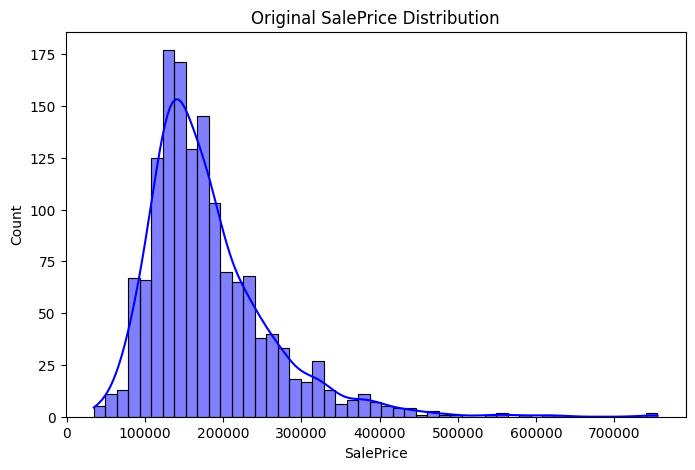

Original Skewness: 1.8828757597682129
Original Kurtosis: 6.536281860064529


In [8]:
# ==============================================================================
# 1. BEFORE TRANSFORMATION: Check original distribution
# ==============================================================================

plt.figure(figsize=(8, 5))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Original SalePrice Distribution')
plt.show()

# Print Skewness (asymmetry) and Kurtosis (peakedness/heavy tails).
# High positive skewness indicates the need for a transformation.
print("Original Skewness:", train_data['SalePrice'].skew())
print("Original Kurtosis:", train_data['SalePrice'].kurtosis())


- i will preform a log transformation to reduce skewness and make the distribution more normal, which can improve model performance.

## 2.2 Numerical Features

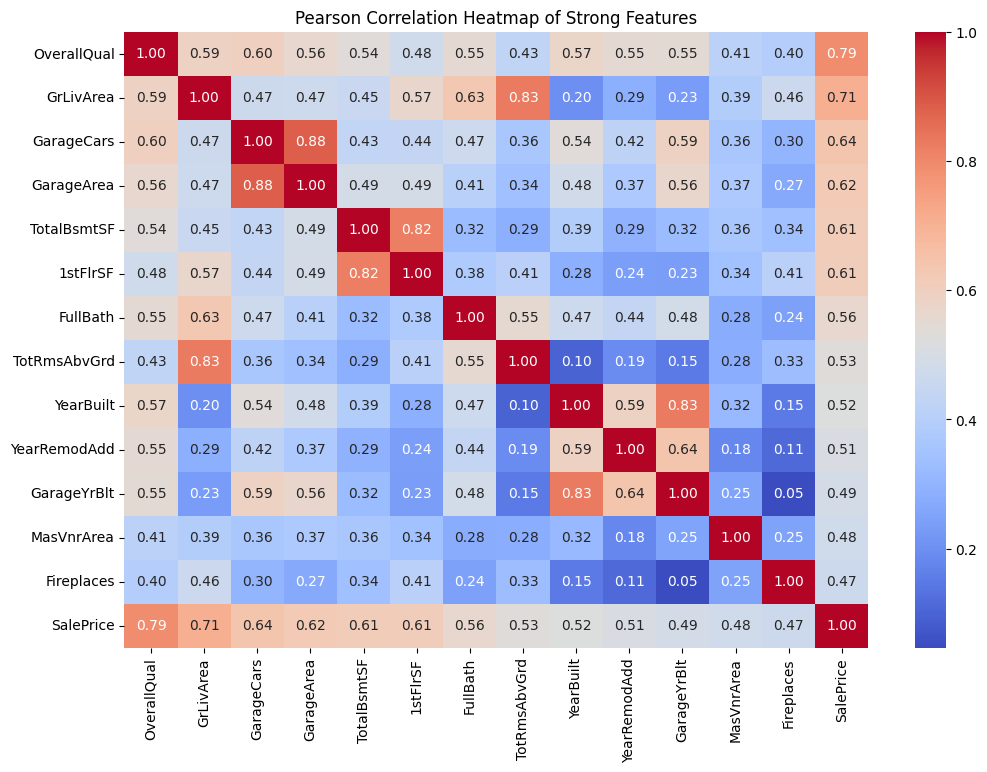

In [9]:
# 1. Calculate Pearson correlation with 'SalePrice' (excluding SalePrice itself)
correlations = train_data.corr(numeric_only=True)['SalePrice'].drop('SalePrice')

# 2. Select only strong features (correlation > 0.4 or < -0.4) and add SalePrice back
strong_features = correlations[abs(correlations) > 0.4].sort_values(ascending=False).index.tolist()
strong_features.append('SalePrice')

# 3. Plot the heatmap explicitly using Pearson method
plt.figure(figsize=(12, 8))
sns.heatmap(train_data[strong_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap of Strong Features")
plt.show()

**Multicollinearity (Redundant Features)**
- The Garage Trap (GarageCars ↔ GarageArea | 0.88): These two tell the model the exact same story. A garage that fits more cars naturally has a larger area.
- The Space Trap (TotalBsmtSF ↔ 1stFlrSF | 0.82): In most of these houses, the footprint of the basement is practically identical to the footprint of the first floor.
- The Room Trap (TotRmsAbvGrd ↔ GrLivArea | 0.83): As the living area increases, the total number of rooms inherently increases.
- The Time Trap (YearBuilt ↔ GarageYrBlt | 0.83): Garages are almost always built at the exact same time as the main house.

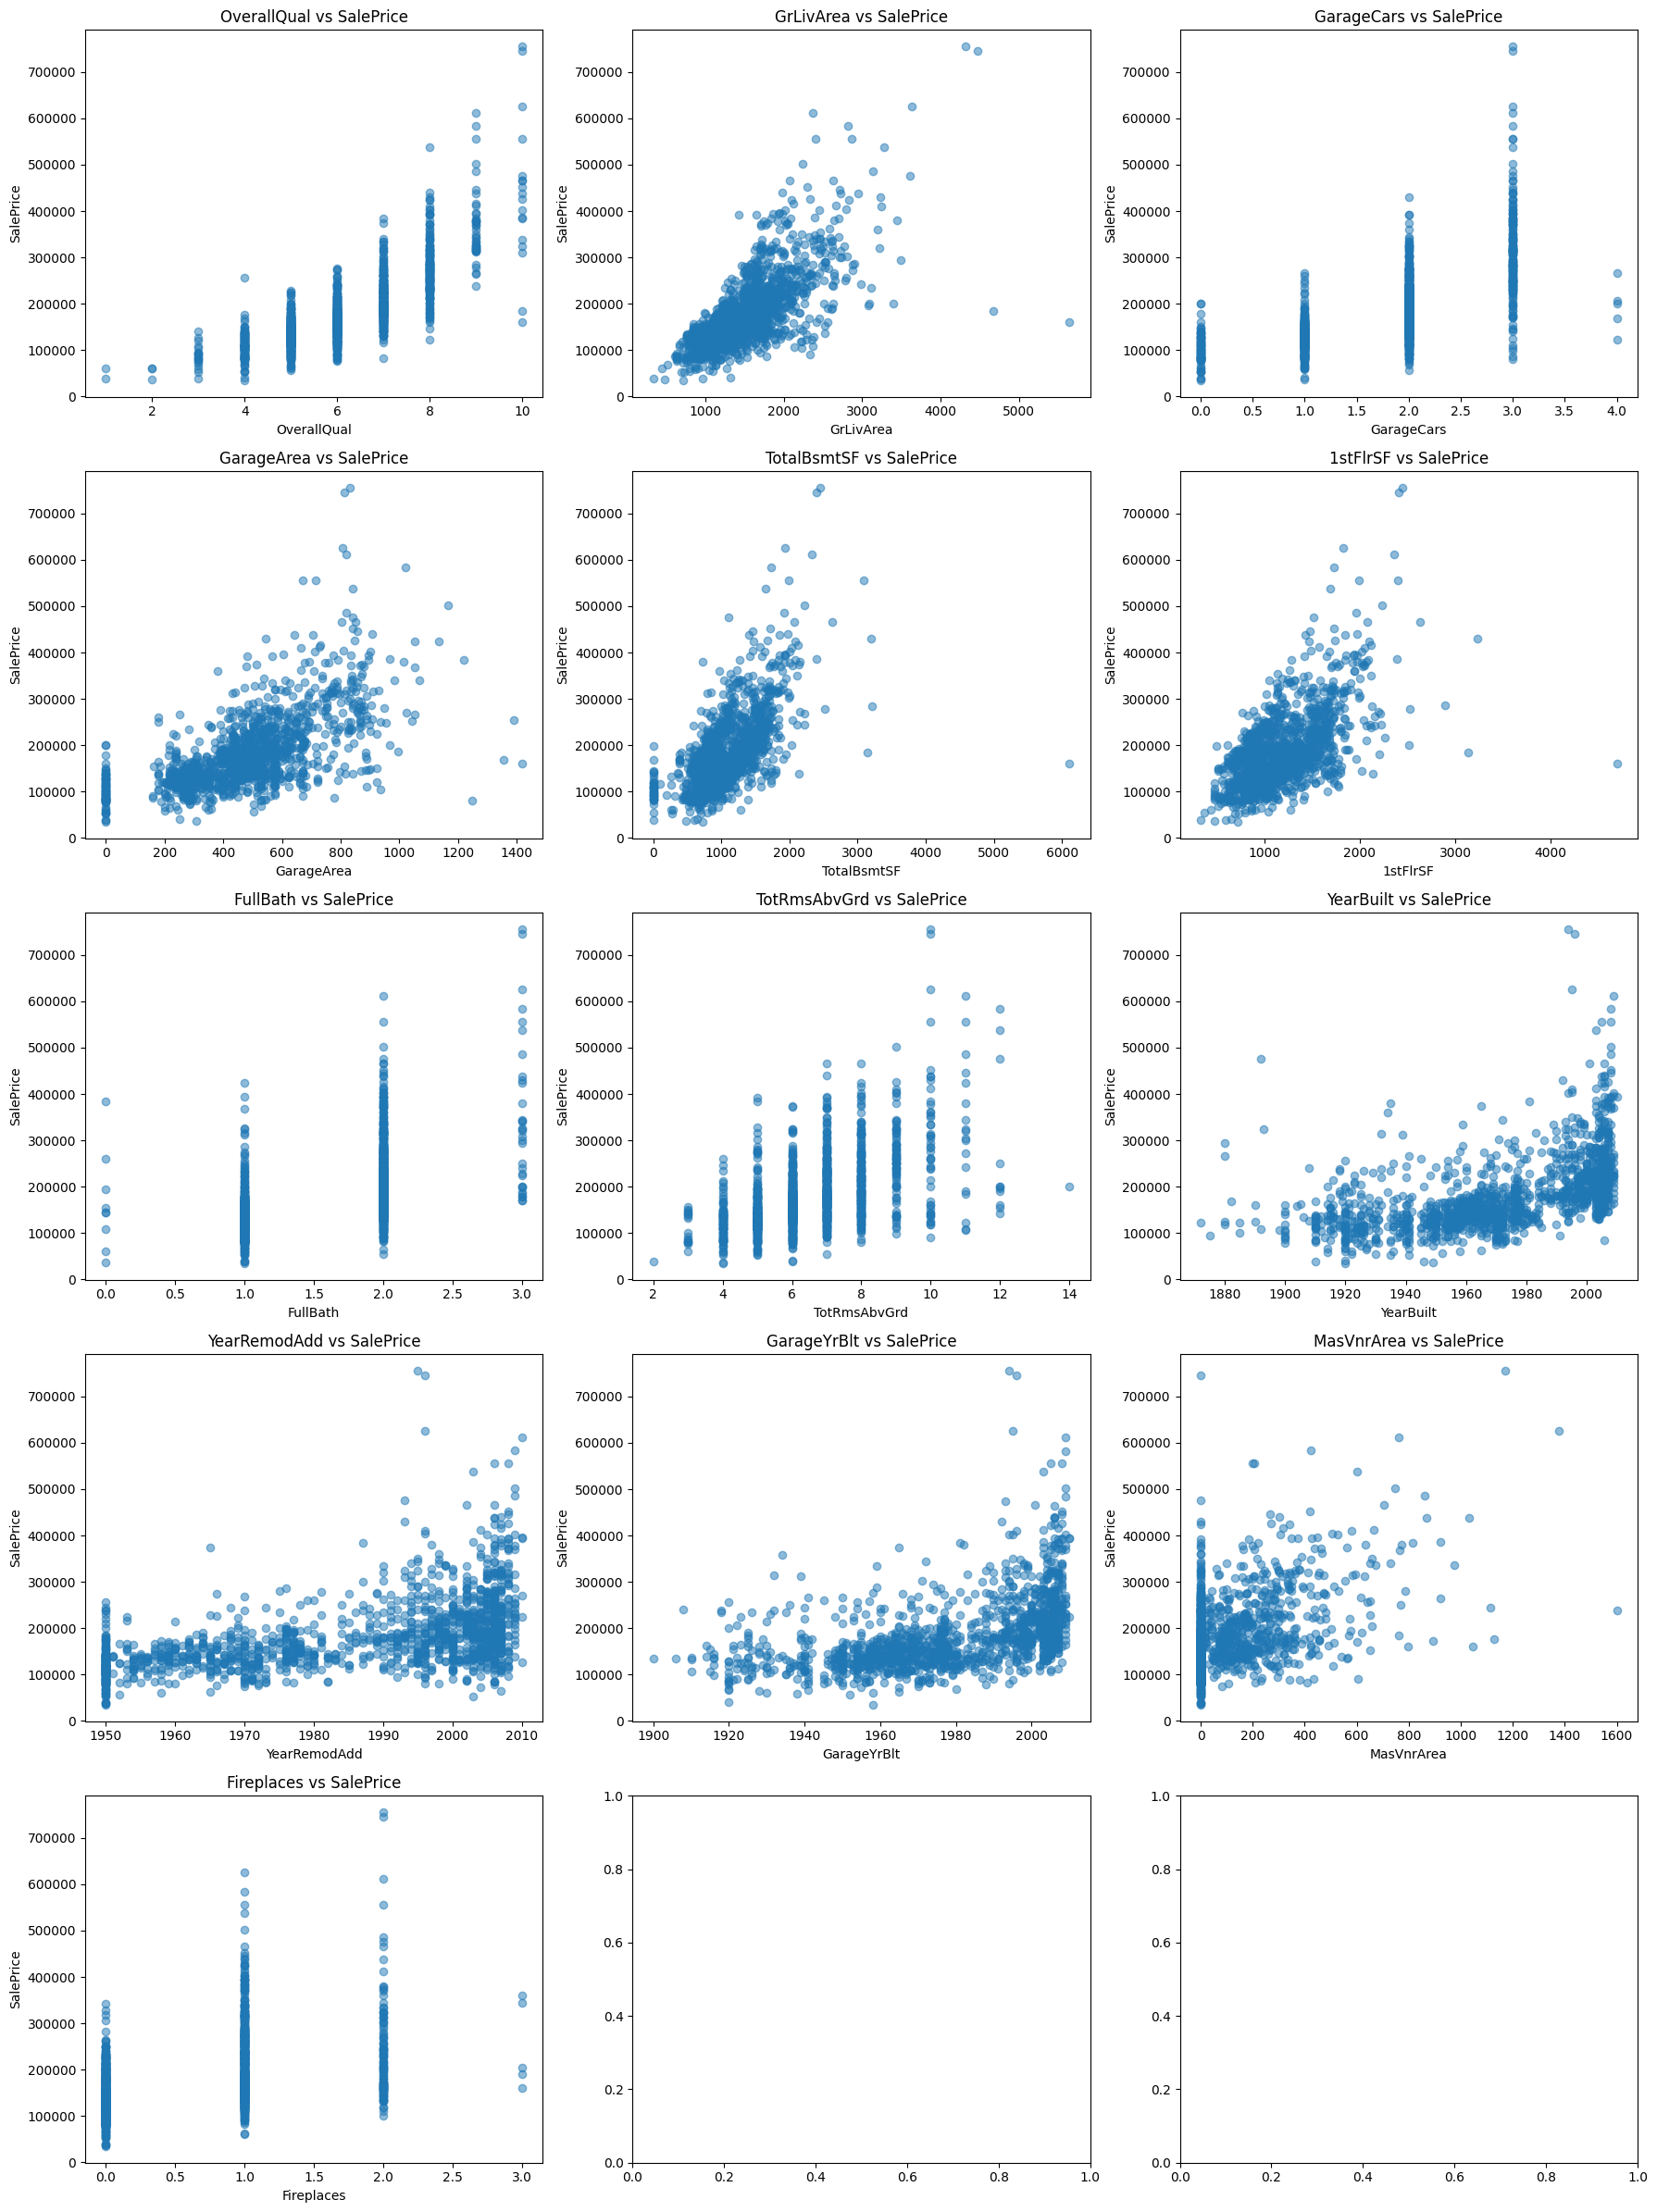

In [10]:
# 1. Create a 5x3 grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 24))

# 2. Loop through features and plot them against SalePrice
for ax, feature in zip(axes.flatten(), strong_features[:-1]):  
    ax.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

- **GrLivArea:** Look at the bottom right of the GrLivArea plot. There are two massive houses (over 4,000 sq ft) that sold for unusually low prices. These are classic outliers and must be removed before training.

## 2.3 Categorical Features
we use ANOVA F-tests across all categorical features, then visualize the most impactful ones.

It groups the houses by a category (like Neighborhood) and checks if the average price is actually different between those groups.

High F-statistic: This feature has a massive impact on the price.

p-value < 0.05: We are mathematically sure this impact is real, not just a random coincidence.

In [11]:
from scipy.stats import f_oneway

# 1. Prevent scientific notation for easier reading of p-values
pd.set_option('display.float_format', '{:.10f}'.format)

# 2. Combine all categorical and discrete features into one list
cat_features_for_anova = (
    list(ordinal_str_features.keys()) +
    nominal_srt_features +
    ordinal_int_features +
    nominal_int_features +
    discrete_numeric_features
)

# 3. Remove any duplicate features
cat_features_for_anova = list(dict.fromkeys(cat_features_for_anova))

anova_results = []

# 4. Perform ANOVA test for each feature
for feature in cat_features_for_anova:
    # Group SalePrice values by the categories of the current feature
    groups = [group['SalePrice'].dropna() for _, group in train_data.groupby(feature)]
    
    # Keep only groups with at least 2 values (ANOVA requirement)
    groups = [g for g in groups if len(g) >= 2]
    
    if len(groups) >= 2:
        # Calculate F-statistic and p-value
        f_stat, p_value = f_oneway(*groups)
        
        # 5. Classify the feature type for the final report
        if feature in ordinal_str_features:
            ftype = 'Ordinal (str)'
        elif feature in ordinal_int_features:
            ftype = 'Ordinal (int)'
        elif feature in nominal_int_features:
            ftype = 'Nominal (int)'
        elif feature in discrete_numeric_features:
            ftype = 'Discrete numeric'
        else:
            ftype = 'Nominal (str)'
        
        # Store the results
        anova_results.append({
            'Feature': feature,
            'Type': ftype,
            'F-statistic': f_stat,
            'p-value': p_value,
            'n_categories': train_data[feature].nunique() 
        })

# 6. Convert to DataFrame and sort by the strongest impact (F-statistic)
anova_df = pd.DataFrame(anova_results).sort_values('F-statistic', ascending=False)
anova_df['Significant'] = anova_df['p-value'] < 0.05

# 7. Print summary and display top 20 features
print(f"Significant features (p < 0.05): {anova_df['Significant'].sum()} / {len(anova_df)}")
print(f"\nTop 20 by F-statistic:\n")
anova_df.head(20)

Significant features (p < 0.05): 52 / 59

Top 20 by F-statistic:



,Feature,Type,F-statistic,p-value,n_categories,Significant
0,ExterQual,Ordinal (str),443.3348314150,0.0000000000,4,True
5,KitchenQual,Ordinal (str),407.8063515584,0.0000000000,4,True
2,BsmtQual,Ordinal (str),392.9135064723,0.0000000000,4,True
56,GarageCars,Discrete numeric,351.2074862088,0.0000000000,5,True
42,OverallQual,Ordinal (int),349.0268395693,0.0000000000,10,True
13,GarageFinish,Ordinal (str),250.9624672136,0.0000000000,3,True
49,FullBath,Discrete numeric,246.0670039249,0.0000000000,4,True
54,Fireplaces,Discrete numeric,146.7411758454,0.0000000000,4,True
4,HeatingQC,Ordinal (str),117.2813468281,0.0000000000,5,True
34,Foundation,Nominal (str),100.2538505874,0.0000000000,6,True


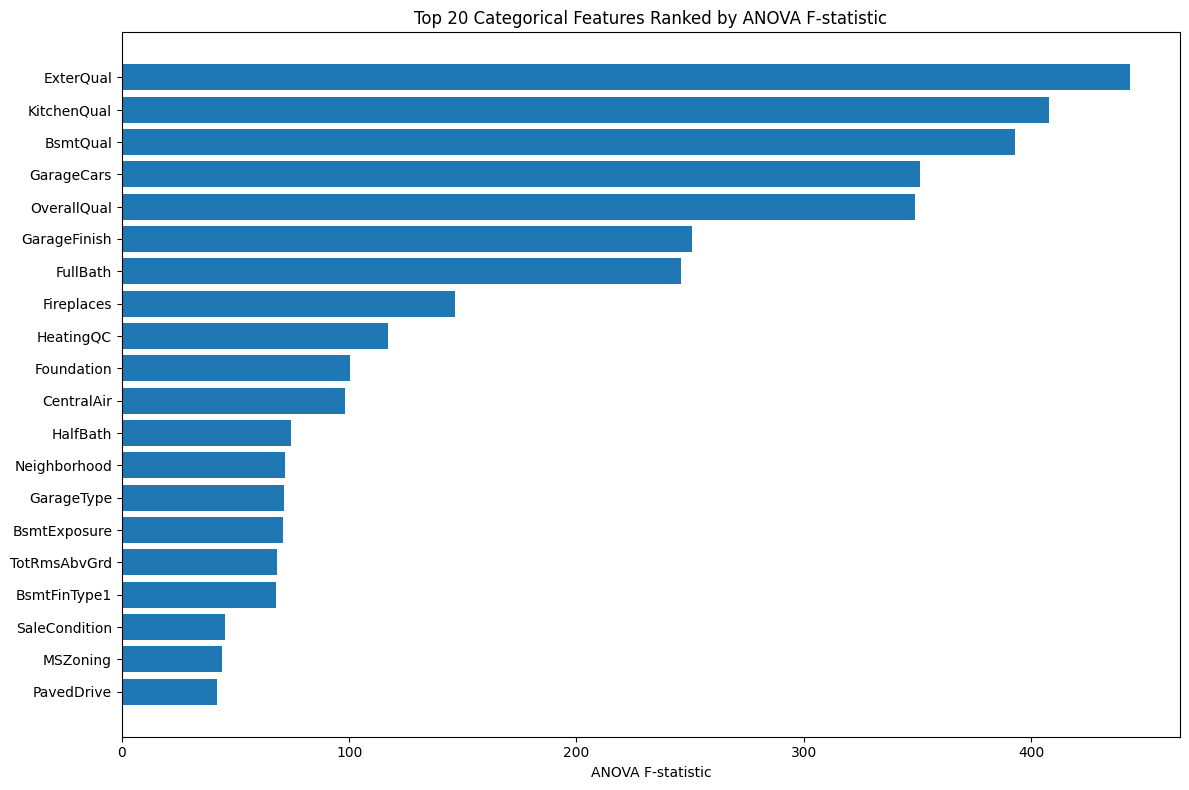

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
top_anova = anova_df.head(20)
ax.barh(range(len(top_anova)), top_anova['F-statistic'],)
ax.set_yticks(range(len(top_anova)))
ax.set_yticklabels(top_anova['Feature'])
ax.set_xlabel('ANOVA F-statistic')
ax.set_title('Top 20 Categorical Features Ranked by ANOVA F-statistic')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Categorical association analysis (Cramér's V):**

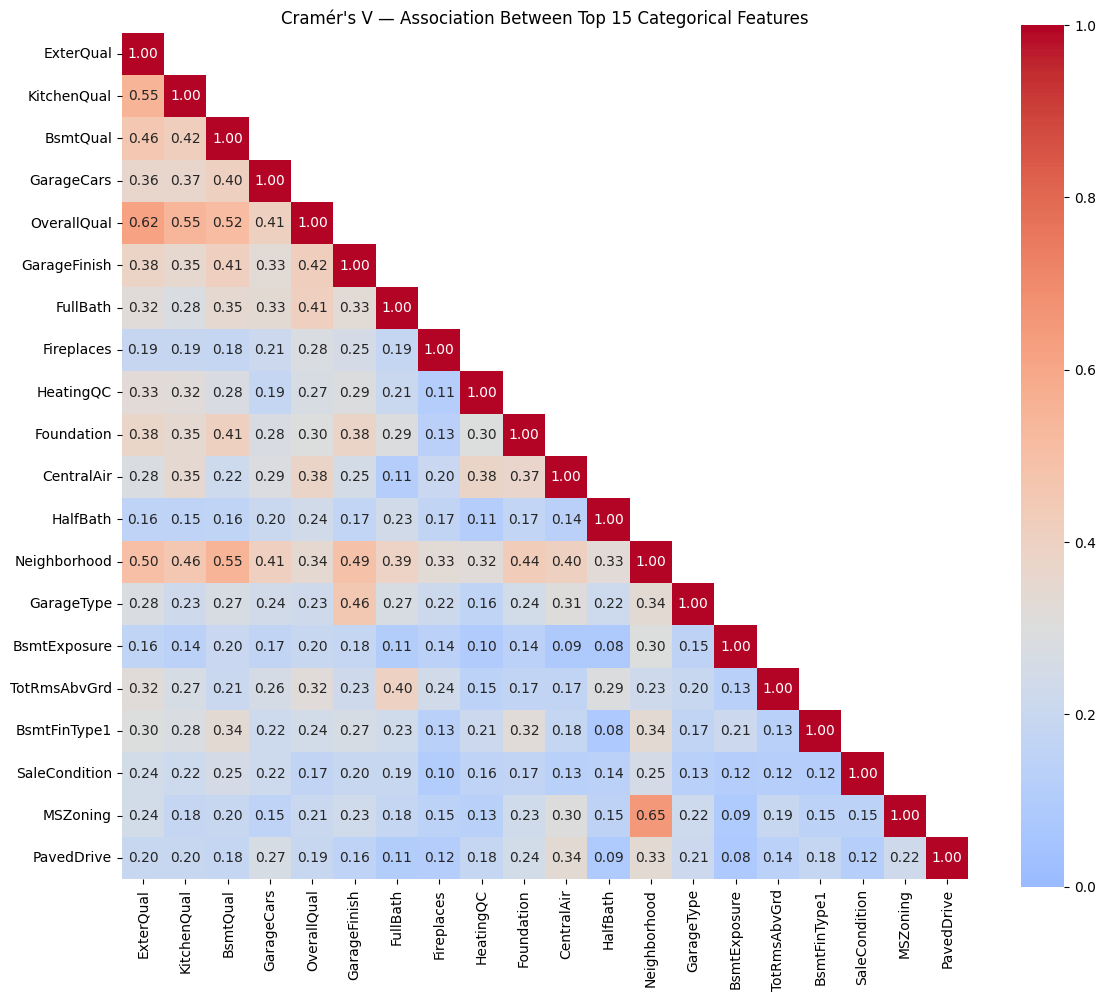

In [13]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Cramér's V: association between two categorical variables (0=none, 1=perfect)"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = len(x)
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0 or n == 0:
        return 0
    return np.sqrt(chi2 / (n * min_dim))

top_anova_features = anova_df.head(20)['Feature'].tolist()

assoc_matrix = pd.DataFrame(index=top_anova_features, columns=top_anova_features, dtype=float)
for i, feat_i in enumerate(top_anova_features):
    for j, feat_j in enumerate(top_anova_features):
        if i == j:
            assoc_matrix.loc[feat_i, feat_j] = 1.0
        elif i < j:
            mask = train_data[[feat_i, feat_j]].notna().all(axis=1)
            v = cramers_v(train_data.loc[mask, feat_i].astype(str), 
                         train_data.loc[mask, feat_j].astype(str))
            assoc_matrix.loc[feat_i, feat_j] = v
            assoc_matrix.loc[feat_j, feat_i] = v

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(assoc_matrix, dtype=bool), k=1)
sns.heatmap(assoc_matrix.astype(float), mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0.3, square=True, ax=ax, vmin=0, vmax=1)
ax.set_title("Cramér's V — Association Between Top 15 Categorical Features")
plt.tight_layout()
plt.show()

Cramér's V checks if two text columns are feeding the model the exact same information (0 = totally different, 1 = identical duplicates).

Cramér’s V helps us see which categorical features are related, but there’s no complete redundancy — each feature provides independent information.

## 2.4 Correlations 

So far, we have looked at Pearson correlations for numerical features and ANOVA for categorical features separately. Now, we combine them using Spearman rank correlation, which captures monotonic (not just linear) relationships and handles ordinal features naturally, providing a unified view across all feature types.

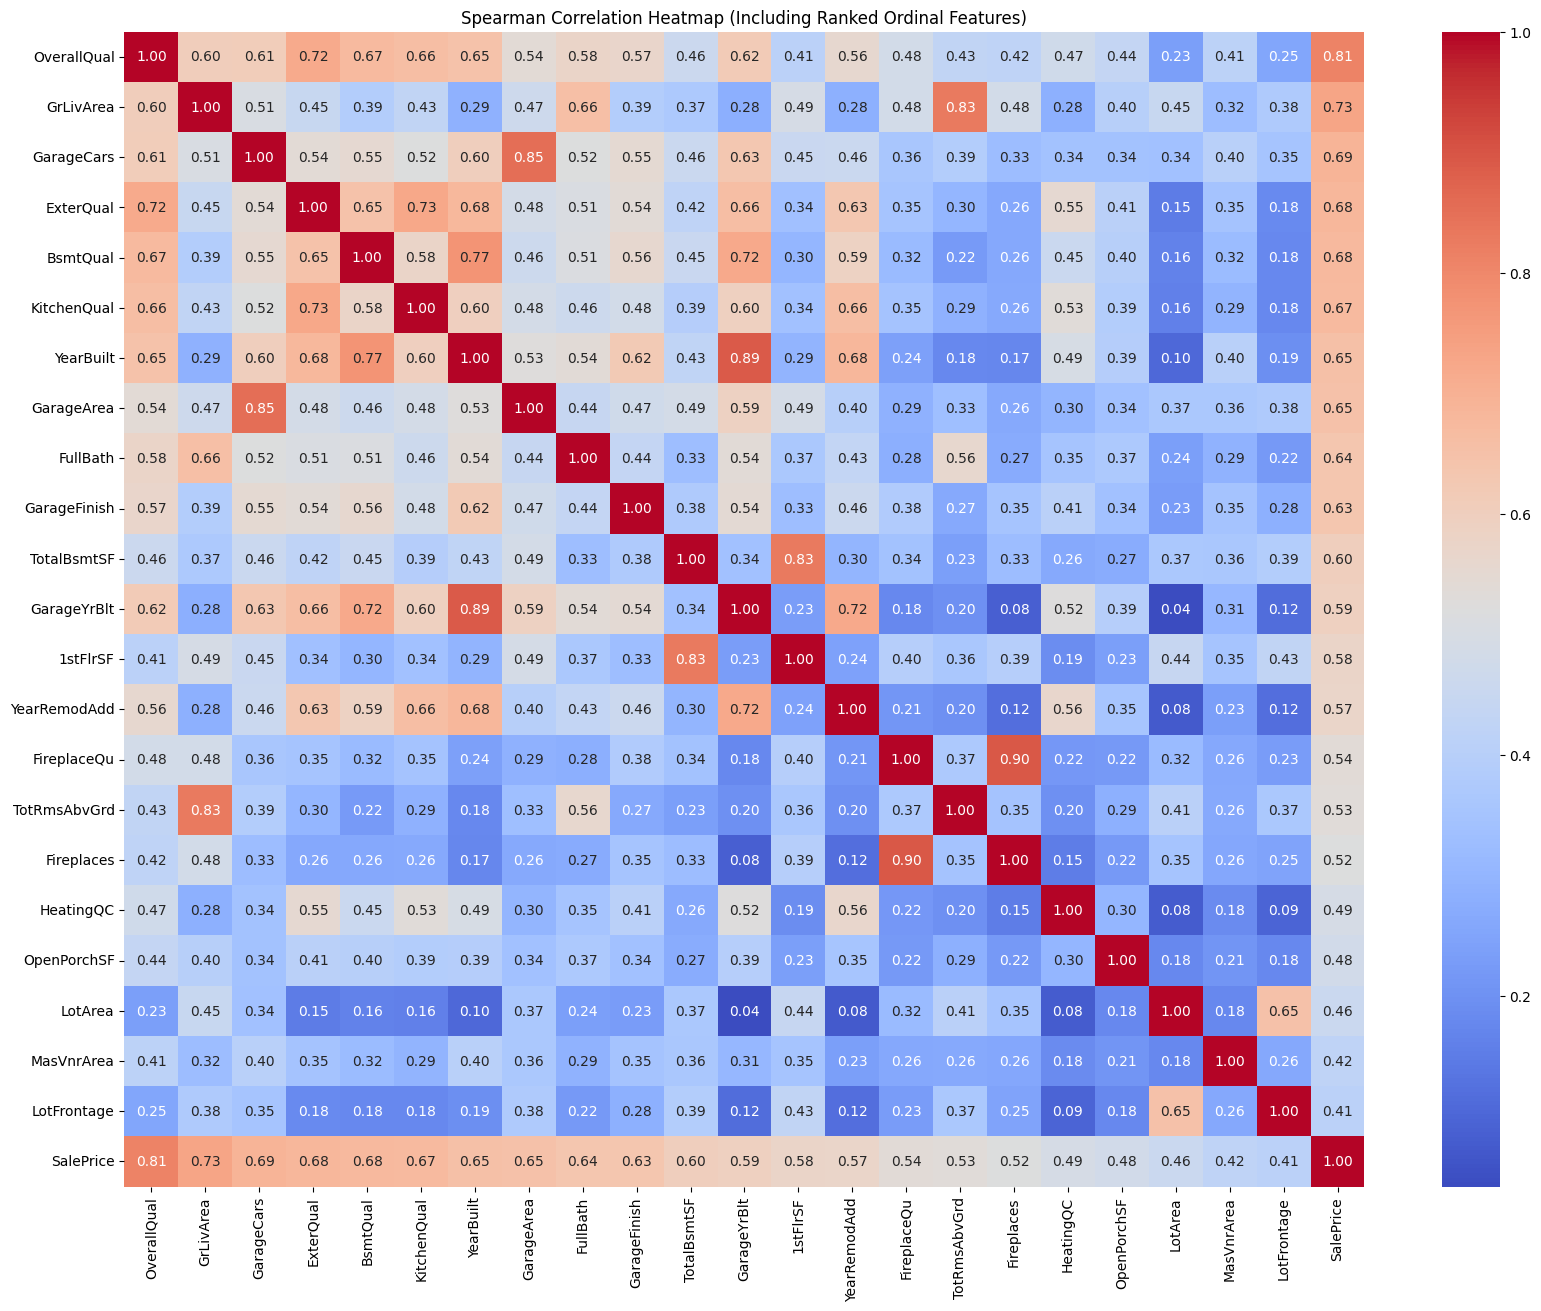

In [14]:
# 1. Create a copy of the data to avoid changing the original dataset
train_encoded = train_data.copy()

# 2. Convert ordinal text categories into ranked numbers (e.g., 'Ex' -> 5)
# NaNs are filled with 0, meaning "Feature does not exist" (e.g., No Garage = 0)
for feature, mapping in ordinal_str_features.items():
    train_encoded[feature] = train_encoded[feature].map(mapping).fillna(0).astype(int)

# 3. Calculate Spearman correlation (best for ranked/ordinal data)
correlations = train_encoded.corr(numeric_only=True, method="spearman")['SalePrice'].drop('SalePrice')

# 4. Filter for strong predictors (|correlation| > 0.4) and add SalePrice back
strong_features = correlations[abs(correlations) > 0.4].sort_values(ascending=False).index.tolist()
strong_features.append('SalePrice')

# 5. Plot the Spearman correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(train_encoded[strong_features].corr(method="spearman"), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap (Including Ranked Ordinal Features)")
plt.show()

**Very Strong Redundancy ($\rho \geq 0.85$)**
- These pairs provide almost identical information. It is highly recommended to drop one from each pair to prevent model confusion.

- FireplaceQu ↔ Fireplaces (0.90).

- GarageYrBlt ↔ YearBuilt (0.89).

- GarageCars ↔ GarageArea (0.85).

**Strong Association ($0.75 \leq \rho < 0.85$)**
- These features overlap significantly but may contain slightly different nuances. Monitor these closely.

- TotalBsmtSF ↔ 1stFlrSF (0.83).
 
- GrLivArea ↔ TotRmsAbvGrd (0.83).

- YearBuilt ↔ BsmtQual (0.77).

**Moderate (0.70 ≤ ρ < 0.75)**
- These features are related but usually independent enough to keep both in the model.

- KitchenQual ↔ ExterQual (0.73).

- OverallQual ↔ ExterQual (0.72).

- GarageYrBlt ↔ BsmtQual (0.72).

- YearRemodAdd ↔ GarageYrBlt (0.72).

# 3. Data Preprocessing

In [15]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0000000000,730.5000000000,421.6100093688,1.0000000000,365.7500000000,730.5000000000,1095.2500000000,1460.0000000000
MSSubClass,1460.0000000000,56.8972602740,42.3005709938,20.0000000000,20.0000000000,50.0000000000,70.0000000000,190.0000000000
LotFrontage,1201.0000000000,70.0499583680,24.2847517745,21.0000000000,59.0000000000,69.0000000000,80.0000000000,313.0000000000
LotArea,1460.0000000000,10516.8280821918,9981.2649323792,1300.0000000000,7553.5000000000,9478.5000000000,11601.5000000000,215245.0000000000
OverallQual,1460.0000000000,6.0993150685,1.3829965467,1.0000000000,5.0000000000,6.0000000000,7.0000000000,10.0000000000
OverallCond,1460.0000000000,5.5753424658,1.1127993367,1.0000000000,5.0000000000,5.0000000000,6.0000000000,9.0000000000
YearBuilt,1460.0000000000,1971.2678082192,30.2029040425,1872.0000000000,1954.0000000000,1973.0000000000,2000.0000000000,2010.0000000000
YearRemodAdd,1460.0000000000,1984.8657534247,20.6454068077,1950.0000000000,1967.0000000000,1994.0000000000,2004.0000000000,2010.0000000000
MasVnrArea,1452.0000000000,103.6852617080,181.0662065872,0.0000000000,0.0000000000,0.0000000000,166.0000000000,1600.0000000000
BsmtFinSF1,1460.0000000000,443.6397260274,456.0980908409,0.0000000000,0.0000000000,383.5000000000,712.2500000000,5644.0000000000


In [16]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0000000000,2190.0000000000,421.3213342173,1461.0000000000,1825.5000000000,2190.0000000000,2554.5000000000,2919.0000000000
MSSubClass,1459.0000000000,57.3783413297,42.7468796187,20.0000000000,20.0000000000,50.0000000000,70.0000000000,190.0000000000
LotFrontage,1232.0000000000,68.5803571429,22.3768412808,21.0000000000,58.0000000000,67.0000000000,80.0000000000,200.0000000000
LotArea,1459.0000000000,9819.1610692255,4955.5173269264,1470.0000000000,7391.0000000000,9399.0000000000,11517.5000000000,56600.0000000000
OverallQual,1459.0000000000,6.0788211103,1.4368116405,1.0000000000,5.0000000000,6.0000000000,7.0000000000,10.0000000000
OverallCond,1459.0000000000,5.5538039753,1.1137396033,1.0000000000,5.0000000000,5.0000000000,6.0000000000,9.0000000000
YearBuilt,1459.0000000000,1971.3577793009,30.3900708372,1879.0000000000,1953.0000000000,1973.0000000000,2001.0000000000,2010.0000000000
YearRemodAdd,1459.0000000000,1983.6627827279,21.1304669082,1950.0000000000,1963.0000000000,1992.0000000000,2004.0000000000,2010.0000000000
MasVnrArea,1444.0000000000,100.7091412742,177.6259001036,0.0000000000,0.0000000000,0.0000000000,164.0000000000,1290.0000000000
BsmtFinSF1,1458.0000000000,439.2037037037,455.2680419797,0.0000000000,0.0000000000,350.5000000000,753.5000000000,4010.0000000000


GarageYrBlt == 2207!!!

## 3.1 Outlier Removal

In [17]:
train_data.query('GrLivArea > 4500 and SalePrice < 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0000000000,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0000000000,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [18]:
train_clean = train_data.drop([523,1298], axis=0).reset_index(drop=True)
y_train = train_clean['SalePrice']
test_clean = test_data.copy()

train_clean.drop(columns=['Id','SalePrice'], inplace=True)
test_clean.drop(columns=['Id'], inplace=True)

## 3.2 Missing Value Treatment

In [19]:
missing_count = train_clean.isnull().sum()
missing_percent = (missing_count / len(train_clean)) * 100

missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)
missing_table = missing_table[missing_table['Missing Values'] > 0]
missing_table

,Missing Values,Percentage
PoolQC,1452,99.5884773663
MiscFeature,1404,96.2962962963
Alley,1367,93.7585733882
Fence,1177,80.7270233196
MasVnrType,872,59.8079561043
FireplaceQu,690,47.3251028807
LotFrontage,259,17.7640603567
GarageQual,81,5.5555555556
GarageFinish,81,5.5555555556
GarageType,81,5.5555555556


In [20]:
missing_count = test_clean.isnull().sum()
missing_percent = (missing_count / len(test_clean)) * 100

missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)
missing_table = missing_table[missing_table['Missing Values'] > 0]
missing_table

,Missing Values,Percentage
PoolQC,1456,99.7943797121
MiscFeature,1408,96.5044551062
Alley,1352,92.6662097327
Fence,1169,80.1233721727
MasVnrType,894,61.2748457848
FireplaceQu,730,50.0342700480
LotFrontage,227,15.5586017820
GarageCond,78,5.3461274846
GarageFinish,78,5.3461274846
GarageYrBlt,78,5.3461274846


In [21]:
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in none_cols:
    train_clean[col] = train_clean[col].fillna('None')
    test_clean[col] = test_clean[col].fillna('None')

zero_values = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 
               'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 
               'BsmtUnfSF', 'GarageArea']

for col in zero_values:
    train_clean[col] = train_clean[col].fillna(0)
    test_clean[col] = test_clean[col].fillna(0)


mode_cols = ['MSZoning', 'Electrical', 'KitchenQual', 'SaleType', 
             'Exterior1st', 'Exterior2nd','Utilities']

for col in mode_cols:
    train_mode = train_clean[col].mode()[0]
    
    train_clean[col] = train_clean[col].fillna(train_mode)
    test_clean[col] = test_clean[col].fillna(train_mode)
    
train_clean['Functional'] = train_clean['Functional'].fillna("Typ")
test_clean['Functional'] = test_clean['Functional'].fillna("Typ")


lot_medians = train_clean.groupby("Neighborhood")["LotFrontage"].median()

train_clean["LotFrontage"] = train_clean["LotFrontage"].fillna(train_clean["Neighborhood"].map(lot_medians))
test_clean["LotFrontage"] = test_clean["LotFrontage"].fillna(test_clean["Neighborhood"].map(lot_medians))

general_median = train_clean["LotFrontage"].median()    
test_clean["LotFrontage"] = test_clean["LotFrontage"].fillna(general_median)

print(f"missing values in train: {train_clean.isnull().sum().sum()}")
print(f"missing values in test: {test_clean.isnull().sum().sum()}")

missing values in train: 0
missing values in test: 0


## 3.3 Feature Encoding

In [22]:
for feature, mapping in ordinal_str_features.items():
    if train_clean[feature].dtype in ['object', 'string']: 
        full_mapping = {**mapping, 'None': 0}    
        train_clean[feature] = train_clean[feature].map(full_mapping).astype(int)
        
    if test_clean[feature].dtype in ['object', 'string']:
        full_mapping = {**mapping, 'None': 0}    
        test_clean[feature] = test_clean[feature].map(full_mapping).astype(int)

train_clean['MSSubClass'] = train_clean['MSSubClass'].astype(str)
test_clean['MSSubClass'] = test_clean['MSSubClass'].astype(str) 

for feature in list(ordinal_str_features.keys())[:3]:
    print(f"Sample from train — {feature} unique values: {sorted(train_clean[feature].unique())}")
print("-"*50)
for feature in list(ordinal_str_features.keys())[3:6]:
    print(f"Sample from test — {feature} unique values: {sorted(test_clean[feature].unique())}")

Sample from train — ExterQual unique values: [np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Sample from train — ExterCond unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Sample from train — BsmtQual unique values: [np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
--------------------------------------------------
Sample from test — BsmtCond unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Sample from test — HeatingQC unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Sample from test — KitchenQual unique values: [np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


## 3.4 Feature Engineering

In [23]:
train_clean['TotalSF'] = train_clean['TotalBsmtSF'] + train_clean['1stFlrSF'] + train_clean['2ndFlrSF']
test_clean['TotalSF'] = test_clean['TotalBsmtSF'] + test_clean['1stFlrSF'] + test_clean['2ndFlrSF']

train_clean['Total_sqr_footage'] = train_clean['BsmtFinSF1'] + train_clean['BsmtFinSF2'] + train_clean['1stFlrSF'] + train_clean['2ndFlrSF']
test_clean['Total_sqr_footage'] = test_clean['BsmtFinSF1'] + test_clean['BsmtFinSF2'] + test_clean['1stFlrSF'] + test_clean['2ndFlrSF']

train_clean['TotalPorchSF'] = train_clean['OpenPorchSF'] + train_clean['EnclosedPorch'] + train_clean['3SsnPorch'] + train_clean['ScreenPorch']
test_clean['TotalPorchSF'] = test_clean['OpenPorchSF'] + test_clean['EnclosedPorch'] + test_clean['3SsnPorch'] + test_clean['ScreenPorch']

train_clean['TotalBath'] = train_clean['FullBath'] + train_clean['BsmtFullBath'] + (0.5 * train_clean['HalfBath']) + (0.5 * train_clean['BsmtHalfBath'])
test_clean['TotalBath'] = test_clean['FullBath'] + test_clean['BsmtFullBath'] + (0.5 * test_clean['HalfBath']) + (0.5 * test_clean['BsmtHalfBath'])

area_features = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

new_area = ['TotalSF', 'Total_sqr_footage', 'TotalPorchSF']

print("✅ Area & count features created successfully for both Train and Test data!")
print(f"  Train TotalSF range:            {train_clean['TotalSF'].min():.0f} — {train_clean['TotalSF'].max():.0f}")
print(f"  Train Total_sqr_footage range:  {train_clean['Total_sqr_footage'].min():.0f} — {train_clean['Total_sqr_footage'].max():.0f}")
print(f"  Train TotalPorchSF range:       {train_clean['TotalPorchSF'].min():.0f} — {train_clean['TotalPorchSF'].max():.0f}")
print(f"  Train TotalBath range:          {train_clean['TotalBath'].min():.1f} — {train_clean['TotalBath'].max():.1f}")
print('-'*100)
print(f"  Test TotalSF range:             {test_clean['TotalSF'].min():.0f} — {test_clean['TotalSF'].max():.0f}")
print(f"  Test Total_sqr_footage range:   {test_clean['Total_sqr_footage'].min():.0f} — {test_clean['Total_sqr_footage'].max():.0f}")
print(f"  Test TotalPorchSF range:        {test_clean['TotalPorchSF'].min():.0f} — {test_clean['TotalPorchSF'].max():.0f}")
print(f"  Test TotalBath range:           {test_clean['TotalBath'].min():.1f} — {test_clean['TotalBath'].max():.1f}")

print("number of missing values in train:", train_clean.isnull().sum().sum())
print("number of missing values in test:", test_clean.isnull().sum().sum())

✅ Area & count features created successfully for both Train and Test data!
  Train TotalSF range:            334 — 6872
  Train Total_sqr_footage range:  334 — 6572
  Train TotalPorchSF range:       0 — 1027
  Train TotalBath range:          1.0 — 6.0
----------------------------------------------------------------------------------------------------
  Test TotalSF range:             612 — 10190
  Test Total_sqr_footage range:   407 — 9105
  Test TotalPorchSF range:        0 — 1207
  Test TotalBath range:           1.0 — 7.0
number of missing values in train: 0
number of missing values in test: 0


In [24]:
test_clean.query('GarageYrBlt > 2010')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_sqr_footage,TotalPorchSF,TotalBath
1132,20,RL,68.0000000000,8298,1,None,3,HLS,4,Inside,...,None,0,9,2007,New,Partial,3110.0000000000,2147.0000000000,0,2.0000000000


In [25]:
test_clean.loc[1132, 'GarageYrBlt'] = 2007

In [26]:
test_clean.query('GarageYrBlt > 2010')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_sqr_footage,TotalPorchSF,TotalBath


In [27]:
train_clean['HouseAge'] = train_clean['YrSold'] - train_clean['YearBuilt']
test_clean['HouseAge'] = test_clean['YrSold'] - test_clean['YearBuilt']

train_clean['RemodAge'] = train_clean['YrSold'] - train_clean['YearRemodAdd']
test_clean['RemodAge'] = test_clean['YrSold'] - test_clean['YearRemodAdd']

train_clean['GarageAge'] = train_clean['YrSold'] - train_clean['GarageYrBlt']
test_clean['GarageAge'] = test_clean['YrSold'] - test_clean['GarageYrBlt']

for age_feat in ['HouseAge', 'RemodAge', 'GarageAge']:
    n_negative = (train_clean[age_feat] < 0).sum()
    if n_negative > 0:
        print(f"  {age_feat}: {n_negative} negative values clipped to 0")
        train_clean[age_feat] = train_clean[age_feat].clip(lower=0)
    n_negative = (test_clean[age_feat] < 0).sum()
    if n_negative > 0:
        print(f"  {age_feat}: {n_negative} negative values clipped to 0")
        test_clean[age_feat] = test_clean[age_feat].clip(lower=0)

train_clean.loc[train_clean['GarageYrBlt'] == 0, 'GarageAge'] = 0
test_clean.loc[test_clean['GarageYrBlt'] == 0, 'GarageAge'] = 0

time_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
new_time_features = ['HouseAge', 'RemodAge', 'GarageAge']

print("✅ Time-based features created successfully for both Train and Test data!\n")
print(f"  Train HouseAge range:      {train_clean['HouseAge'].min():.0f} — {train_clean['HouseAge'].max():.0f} years")
print(f"  Train RemodAge range:      {train_clean['RemodAge'].min():.0f} — {train_clean['RemodAge'].max():.0f} years")
print(f"  Train GarageAge range:     {train_clean['GarageAge'].min():.0f} — {train_clean['GarageAge'].max():.0f} years")
print('-'*100)
print(f"  Test HouseAge range:       {test_clean['HouseAge'].min():.0f} — {test_clean['HouseAge'].max():.0f} years")
print(f"  Test RemodAge range:       {test_clean['RemodAge'].min():.0f} — {test_clean['RemodAge'].max():.0f} years")
print(f"  Test GarageAge range:      {test_clean['GarageAge'].min():.0f} — {test_clean['GarageAge'].max():.0f} years")
print('-'*100)
print("number of missing values in train:", train_clean.isnull().sum().sum())
print("number of missing values in test:", test_clean.isnull().sum().sum())

  HouseAge: 1 negative values clipped to 0
  RemodAge: 2 negative values clipped to 0
  GarageAge: 1 negative values clipped to 0
✅ Time-based features created successfully for both Train and Test data!

  Train HouseAge range:      0 — 136 years
  Train RemodAge range:      0 — 60 years
  Train GarageAge range:     0 — 107 years
----------------------------------------------------------------------------------------------------
  Test HouseAge range:       0 — 129 years
  Test RemodAge range:       0 — 60 years
  Test GarageAge range:      0 — 114 years
----------------------------------------------------------------------------------------------------
number of missing values in train: 0
number of missing values in test: 0


In [28]:
train_clean['HasBasement'] = (train_clean['TotalBsmtSF'] > 0).astype(int)
test_clean['HasBasement'] = (test_clean['TotalBsmtSF'] > 0).astype(int)

train_clean['HasGarage'] = (train_clean['GarageArea'] > 0).astype(int)
test_clean['HasGarage'] = (test_clean['GarageArea'] > 0).astype(int)

train_clean['Has2ndFloor'] = (train_clean['2ndFlrSF'] > 0).astype(int)
test_clean['Has2ndFloor'] = (test_clean['2ndFlrSF'] > 0).astype(int)

train_clean['HasPool'] = (train_clean['PoolArea'] > 0).astype(int)
test_clean['HasPool'] = (test_clean['PoolArea'] > 0).astype(int)

train_clean['HasPorch'] = (train_clean['TotalPorchSF'] > 0).astype(int)
test_clean['HasPorch'] = (test_clean['TotalPorchSF'] > 0).astype(int)

train_clean['IsRemodeled'] = (train_clean['YearRemodAdd'] != train_clean['YearBuilt']).astype(int)
test_clean['IsRemodeled'] = (test_clean['YearRemodAdd'] != test_clean['YearBuilt']).astype(int)

train_clean['HasMasVnr'] = (train_clean['MasVnrArea'] > 0).astype(int)
test_clean['HasMasVnr'] = (test_clean['MasVnrArea'] > 0).astype(int)

train_clean['HasWoodDeck'] = (train_clean['WoodDeckSF'] > 0).astype(int)
test_clean['HasWoodDeck'] = (test_clean['WoodDeckSF'] > 0).astype(int)

train_clean['HasFirePlace'] = (train_clean['Fireplaces'] > 0).astype(int)
test_clean['HasFirePlace'] = (test_clean['Fireplaces'] > 0).astype(int)

train_clean['IsNew'] = (train_clean['HouseAge'] <= 5).astype(int)
test_clean['IsNew'] = (test_clean['HouseAge'] <= 5).astype(int)

use_in_has_features = ['TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'PoolArea', 'TotalPorchSF', 'YearRemodAdd', 'MasVnrArea', 'WoodDeckSF', 'Fireplaces']
has_feasure = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasPool', 'HasPorch', 'IsRemodeled', 'HasMasVnr', 'HasWoodDeck', 'HasFirePlace', 'IsNew']


flags = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasPool', 'HasPorch',
         'IsRemodeled', 'HasMasVnr', 'HasWoodDeck', 'HasFirePlace', 'IsNew']

print(f"{'Flag Feature':<15} | {'Train % True':<12} | {'Test % True':<12}")
print("-" * 45)
for flag in flags:
    train_pct = train_clean[flag].mean() * 100
    test_pct = test_clean[flag].mean() * 100
    print(f"{flag:<15} | {train_pct:>5.1f}%       | {test_pct:>5.1f}%")

Flag Feature    | Train % True | Test % True 
---------------------------------------------
HasBasement     |  97.5%       |  97.1%
HasGarage       |  94.4%       |  94.7%
Has2ndFloor     |  43.1%       |  42.5%
HasPool         |   0.4%       |   0.4%
HasPorch        |  68.6%       |  71.6%
IsRemodeled     |  47.7%       |  45.4%
HasMasVnr       |  40.4%       |  38.9%
HasWoodDeck     |  47.8%       |  47.8%
HasFirePlace    |  52.7%       |  50.0%
IsNew           |  21.1%       |  21.7%


In [29]:
train_clean['OverallQual_TotalSF'] = train_clean['OverallQual'] * train_clean['TotalSF']
test_clean['OverallQual_TotalSF'] = test_clean['OverallQual'] * test_clean['TotalSF']

train_clean['OverallQual_GrLivArea'] = train_clean['OverallQual'] * train_clean['GrLivArea']
test_clean['OverallQual_GrLivArea'] = test_clean['OverallQual'] * test_clean['GrLivArea']

train_clean['OverallQual_GarageArea'] = train_clean['OverallQual'] * train_clean['GarageArea']
test_clean['OverallQual_GarageArea'] = test_clean['OverallQual'] * test_clean['GarageArea']

use_in_interaction = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageArea']  
interaction_features = ['OverallQual_TotalSF', 'OverallQual_GrLivArea', 'OverallQual_GarageArea']

print("✅ Interaction features created successfully for both Train and Test data!\n")
print(f"  Train OverallQual_TotalSF range: {train_clean['OverallQual_TotalSF'].min():.0f} — {train_clean['OverallQual_TotalSF'].max():.0f}")
print(f"  Test OverallQual_TotalSF range:  {test_clean['OverallQual_TotalSF'].min():.0f} — {test_clean['OverallQual_TotalSF'].max():.0f}")
print('-'*100)
print(f"  Train OverallQual_GrLivArea range: {train_clean['OverallQual_GrLivArea'].min():.0f} — {train_clean['OverallQual_GrLivArea'].max():.0f}")
print(f"  Test OverallQual_GrLivArea range:  {test_clean['OverallQual_GrLivArea'].min():.0f} — {test_clean['OverallQual_GrLivArea'].max():.0f}")
print('-'*100)
print(f"  Train OverallQual_GarageArea range: {train_clean['OverallQual_GarageArea'].min():.0f} — {train_clean['OverallQual_GarageArea'].max():.0f}")
print(f"  Test OverallQual_GarageArea range:  {test_clean['OverallQual_GarageArea'].min():.0f} — {test_clean['OverallQual_GarageArea'].max():.0f}")

✅ Interaction features created successfully for both Train and Test data!

  Train OverallQual_TotalSF range: 334 — 68720
  Test OverallQual_TotalSF range:  733 — 101900
----------------------------------------------------------------------------------------------------
  Train OverallQual_GrLivArea range: 334 — 44760
  Test OverallQual_GrLivArea range:  733 — 50950
----------------------------------------------------------------------------------------------------
  Train OverallQual_GarageArea range: 0 — 12200
  Test OverallQual_GarageArea range:  0 — 12132


## 3.5 Feature Encoding — One-Hot Encoding

In [30]:
nominal_features = train_clean.select_dtypes(include=['object', 'string']).columns.tolist()
print(f'nominal_features: {nominal_features}')

print(f"Nominal features to one-hot encode: {len(nominal_features)}")
print("-" * 50)
print(f"Total columns before encoding (Train): {train_clean.shape[1]}")
print(f"Total columns before encoding (Test):  {test_clean.shape[1]}")
print("-" * 50)

train_clean = pd.get_dummies(train_clean, columns=nominal_features, drop_first=True, dtype=int)
test_clean = pd.get_dummies(test_clean, columns=nominal_features, drop_first=True, dtype=int)

test_clean = test_clean.reindex(columns=train_clean.columns, fill_value=0)
test_clean = test_clean.astype(train_clean.dtypes)

print(f"Total columns after encoding (Train):  {train_clean.shape[1]}")
print(f"Total columns after encoding (Test):   {test_clean.shape[1]}")

if train_clean.shape[1] == test_clean.shape[1]:
    print("\n✅ SUCCESS: Train and Test have the EXACT same number of columns!")
else:
    print("\n❌ ERROR: Column mismatch detected!")

nominal_features: ['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']
Nominal features to one-hot encode: 23
--------------------------------------------------
Total columns before encoding (Train): 99
Total columns before encoding (Test):  99
--------------------------------------------------
Total columns after encoding (Train):  236
Total columns after encoding (Test):   236

✅ SUCCESS: Train and Test have the EXACT same number of columns!


In [31]:
print("--- Train Data Types ---")
print(train_clean.dtypes.value_counts())
print("\n--- Test Data Types ---")
print(test_clean.dtypes.value_counts())

print("\n" + "="*50)
if train_clean.dtypes.equals(test_clean.dtypes):
    print("✅ SUCCESS: The columns AND data types are exactly the same.")
else:
    print("❌ ERROR: There is still a mismatch in data types.")
print("="*50)

--- Train Data Types ---
int64      231
float64      5
Name: count, dtype: int64

--- Test Data Types ---
int64      231
float64      5
Name: count, dtype: int64

✅ SUCCESS: The columns AND data types are exactly the same.


## 3.6 Skewness Correction (log1p)

In [32]:
binary_features = [
    f for f in train_clean.columns
    if train_clean[f].dropna().isin([0, 1]).all()
]
print(f"Binary features identified: {len(binary_features)}")
print(f"Sample binary features: {binary_features[:10]}")

Binary features identified: 172
Sample binary features: ['Street', 'CentralAir', 'HasBasement', 'HasGarage', 'Has2ndFloor', 'HasPool', 'HasPorch', 'IsRemodeled', 'HasMasVnr', 'HasWoodDeck']


In [33]:
non_binary_features = [f for f in train_clean.columns if f not in binary_features]
print(f"Non-binary features: {len(non_binary_features)}")
not_continuous = [
    "LotShape",
    "Utilities",
    "LandSlope",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
    "Functional",
    "Fireplaces",
    "FireplaceQu",
    "GarageYrBlt",
    "GarageFinish",
    "GarageCars",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "Fence",
    "MoSold",
    "YrSold",
    "TotalBath",
    "HouseAge",
    "RemodAge",
    "GarageAge",
]

continuous_features = [f for f in non_binary_features if f not in not_continuous]

print(f"Continuous features (Skew Candidates): {len(continuous_features)}")
print("Continuous features :", continuous_features)

Non-binary features: 64
Continuous features (Skew Candidates): 25
Continuous features : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'Total_sqr_footage', 'TotalPorchSF', 'OverallQual_TotalSF', 'OverallQual_GrLivArea', 'OverallQual_GarageArea']


In [34]:
skewness = train_clean[continuous_features].skew().sort_values(ascending=False)

high_skew = skewness[skewness.abs() > 0.50]

print(f"Continuous features considered: {len(continuous_features)}")
print(f"Features with |skewness| > 0.50: {len(high_skew)}\n")

transformed = []
reverted = []

for feat in high_skew.index:

    if (train_clean[feat] >= 0).all():
        old_skew = train_clean[feat].skew()
        
        transformed_col = np.log1p(train_clean[feat])
        new_skew = transformed_col.skew()
        
        if abs(new_skew) < abs(old_skew):
            train_clean[feat] = transformed_col
            
            if feat in test_clean.columns:
                test_clean[feat] = np.log1p(test_clean[feat])
                
            transformed.append(feat)
        else:
            reverted.append(feat)

print(f"✅ Transformed successfully: {len(transformed)}")
for feat in transformed:
    print(f"  {feat}: {high_skew[feat]:.2f} → {train_clean[feat].skew():.2f}")

if reverted:
    print(f"\n❌ Reverted (made worse): {len(reverted)}")
    for feat in reverted:
         print(f"  {feat}: {high_skew[feat]:.2f} → would become {np.log1p(train_clean[feat]).skew():.2f}")

Continuous features considered: 25
Features with |skewness| > 0.50: 24

✅ Transformed successfully: 21
  MiscVal: 24.46 → 5.17
  PoolArea: 15.95 → 15.52
  LotArea: 12.57 → -0.18
  3SsnPorch: 10.30 → 7.73
  LowQualFinSF: 9.00 → 7.45
  BsmtFinSF2: 4.25 → 2.52
  ScreenPorch: 4.12 → 3.15
  EnclosedPorch: 3.09 → 2.11
  MasVnrArea: 2.70 → 0.51
  OpenPorchSF: 2.34 → -0.02
  TotalPorchSF: 2.01 → -0.51
  LotFrontage: 1.55 → -1.00
  WoodDeckSF: 1.55 → 0.16
  OverallQual_GrLivArea: 1.49 → -0.36
  OverallQual_TotalSF: 1.39 → -0.59
  Total_sqr_footage: 1.02 → -0.16
  GrLivArea: 1.01 → -0.07
  1stFlrSF: 0.89 → 0.01
  2ndFlrSF: 0.81 → 0.29
  TotalSF: 0.80 → -0.47
  BsmtFinSF1: 0.76 → -0.62

❌ Reverted (made worse): 3
  OverallQual_GarageArea: 0.95 → would become -3.42
  BsmtUnfSF: 0.92 → would become -2.18
  TotalBsmtSF: 0.51 → would become -5.17


## 3.7 Near-Zero Variance Filter Filter

In [35]:
THRESHOLD = 0.996

def near_zero_variance(df, threshold=THRESHOLD):
    nzv_features = []
    nzv_details = []
    
    for col in df.columns:
        freq = df[col].value_counts(normalize=True)
        if len(freq) == 0: continue
        
        dominant_pct = freq.iloc[0]
        n_unique = df[col].nunique()
        
        if dominant_pct >= threshold:
            nzv_features.append(col)
            nzv_details.append({
                'Feature': col,
                'Dominant Value': freq.index[0],
                'Dominant %': f"{dominant_pct:.3%}",
                'Unique Values': n_unique,
                'Minority Count': int((1 - dominant_pct) * len(df))
            })
            
    if not nzv_details:
        return [], pd.DataFrame()
        
    return nzv_features, pd.DataFrame(nzv_details).sort_values('Dominant %', ascending=False)

nzv_features, nzv_df = near_zero_variance(train_clean, threshold=THRESHOLD)

print(f"Near-zero variance features (>{THRESHOLD*100:.1f}% one value): {len(nzv_features)} / {train_clean.shape[1]}")

if not nzv_df.empty:
    print(f"\nFeatures to remove:")
    print(nzv_df.to_string(index=False))
    
    train_clean = train_clean.drop(columns=nzv_features, errors='ignore')
    test_clean = test_clean.drop(columns=nzv_features, errors='ignore')
    print(f"\n✅ Successfully dropped {len(nzv_features)} features from both datasets.")
else:
    print("\n✅ No near-zero variance features found. Dataset is healthy!")

Near-zero variance features (>99.6% one value): 40 / 236

Features to remove:
              Feature  Dominant Value Dominant %  Unique Values  Minority Count
            Utilities               4    99.931%              2               0
   Exterior2nd_CBlock               0    99.931%              2               0
   Exterior1st_CBlock               0    99.931%              2               0
    Exterior2nd_Other               0    99.931%              2               0
  Exterior1st_AsphShn               0    99.931%              2               0
        RoofMatl_Roll               0    99.931%              2               0
       RoofMatl_Metal               0    99.931%              2               0
     RoofMatl_Membran               0    99.931%              2               0
       Electrical_Mix               0    99.931%              2               0
  Exterior1st_ImStucc               0    99.931%              2               0
      Condition2_RRAn               0    9

In [36]:
nzv_dummies = [f for f in nzv_features if '_' in f]
nzv_original = [f for f in nzv_features if '_' not in f]

print("📊 Breakdown of the 40 removed features:")
print(f"  One-hot dummies (created by get_dummies): {len(nzv_dummies)}")
print(f"  Original features (always been dead):     {len(nzv_original)}")

if nzv_original:
    print(f"\n  Original features names: {nzv_original}")
    
print(f"\n✅ Current columns in train_clean: {train_clean.shape[1]}")
print(f"✅ Current columns in test_clean:  {test_clean.shape[1]}")

📊 Breakdown of the 40 removed features:
  One-hot dummies (created by get_dummies): 39
  Original features (always been dead):     1

  Original features names: ['Utilities']

✅ Current columns in train_clean: 196
✅ Current columns in test_clean:  196


# 5. Modelization


In [37]:
# 1. Final Data Preparation
# Create final copies of the preprocessed DataFrames to be used for modeling.
X_train_cleanF = train_clean.copy()
X_test_cleanF = test_clean.copy()

# 2. Target Transformation
# Apply log transformation (log1p) to the target variable to handle skewness 
# and make the distribution closer to normal (Gaussian)
y_train_cleanF = np.log1p(y_train)

# 3. Shape Verification
# Display the final dimensions of the datasets to ensure feature consistency
print(f"Final preprocessed training data shape: {X_train_cleanF.shape}")
print(f"Final preprocessed test data shape: {X_test_cleanF.shape}")

# 4. Integrity & Validation Checks
# Check if the number of test samples remains consistent with the original data
print(len(X_test_cleanF) == len(test_data))

# Verify that the feature columns in Train and Test sets are identical and in the same order
print(X_train_cleanF.columns.equals(X_test_cleanF.columns))

# Ensure the number of training samples matches the number of target labels
print(len(X_train_cleanF) == len(y_train))

Final preprocessed training data shape: (1458, 196)
Final preprocessed test data shape: (1459, 196)
True
True
True


In [38]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,cross_validate,RandomizedSearchCV,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error , root_mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV,Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor


**Defining scoring function**

In [39]:
def train_test_rmse_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train_cleanF, y_train_cleanF, 
                            scoring='neg_root_mean_squared_error', 
                            cv=kf, 
                            n_jobs=-1,
                            return_train_score=True) 
    
    train_scores = -scores['train_score']
    test_scores = -scores['test_score']
    
    return train_scores, test_scores

**LinearRegression,Ridge,Lasso,ElasticNet**

In [40]:
ridge_alphas = [1.0, 5.0, 10.0, 20.0, 50.0, 100.0]
lasso_alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.01, 0.1]
elastic_alphas = [0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1.0]
elastic_l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]


linear_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LinearRegression())
])

ridge_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', RidgeCV(alphas=ridge_alphas, cv=5))
])

lasso_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LassoCV(alphas=lasso_alphas, cv=5, max_iter=500000,random_state=42))
])

elastic_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', ElasticNetCV(alphas=elastic_alphas, l1_ratio=elastic_l1_ratios, cv=5, max_iter=500000,random_state=42))
])

models = {
    'Linear Regression': linear_pipeline,
    'Ridge Regression': ridge_pipeline,
    'Lasso Regression': lasso_pipeline,
    'ElasticNet Regression': elastic_pipeline
}

for name, model in models.items():
    print("-"*100)
    
    train_rmse, test_rmse = train_test_rmse_cv(model)
    
    model.fit(X_train_cleanF, y_train_cleanF)
    y_train_pred = model.predict(X_train_cleanF)
    train_rmse_pred = root_mean_squared_error(y_train_cleanF, y_train_pred)
    
    print(f"{name}:")
    print(f"  Train RMSE: {train_rmse.mean():.4f} (std: {train_rmse.std():.4f})")
    print(f"  Test RMSE:  {test_rmse.mean():.4f} (std: {test_rmse.std():.4f})")
    print(f"  Train RMSE (pred): {train_rmse_pred:.4f}")
    
    if hasattr(model.named_steps['model'], 'alpha_'):
        print(f"  Optimal alpha: {model.named_steps['model'].alpha_:.4f}")
    if hasattr(model.named_steps['model'], 'l1_ratio_'):
        print(f"  Optimal l1_ratio: {model.named_steps['model'].l1_ratio_:.4f}")
        
    print("-"*100)

----------------------------------------------------------------------------------------------------
Linear Regression:
  Train RMSE: 0.0891 (std: 0.0018)
  Test RMSE:  0.1201 (std: 0.0069)
  Train RMSE (pred): 0.0919
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Ridge Regression:
  Train RMSE: 0.0966 (std: 0.0019)
  Test RMSE:  0.1123 (std: 0.0085)
  Train RMSE (pred): 0.0979
  Optimal alpha: 10.0000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Lasso Regression:
  Train RMSE: 0.1002 (std: 0.0017)
  Test RMSE:  0.1119 (std: 0.0076)
  Train RMSE (pred): 0.0943
  Optimal alpha: 0.0001
-------------------------------------------------------------------------------------------------

**GradientBoostingRegressor**

In [41]:
gb = GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=8,
    min_samples_split=9,
    subsample=0.9109230652224231,
    max_features='sqrt',
    n_estimators=2123,
    learning_rate=0.01196430751991802,
    random_state=42
)

gb_train_rmse, gb_test_rmse = train_test_rmse_cv(gb)
print(f"Gradient Boosting Regressor:")
print(f"  Train RMSE: {gb_train_rmse.mean():.4f} (std: {gb_train_rmse.std():.4f})")
print(f"  Test RMSE:  {gb_test_rmse.mean():.4f} (std: {gb_test_rmse.std():.4f})")

Gradient Boosting Regressor:
  Train RMSE: 0.0669 (std: 0.0015)
  Test RMSE:  0.1126 (std: 0.0090)


**XGBRegressor**

In [42]:
xgp = XGBRegressor(
    max_depth=3,
    n_estimators=5230,
    learning_rate=0.006060170769889412,
    colsample_bytree=0.22560240422639805,
    subsample=0.6719990145004142,
    min_child_weight=9,
    reg_alpha=0.2179255104034668,
    reg_lambda=0.3830934289061792,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgp_train_rmse, xgp_test_rmse = train_test_rmse_cv(xgp)

print(f"XGBoost Regressor:")
print(f"  Train RMSE: {xgp_train_rmse.mean():.4f} (std: {xgp_train_rmse.std():.4f})")
print(f"  Test RMSE:  {xgp_test_rmse.mean():.4f} (std: {xgp_test_rmse.std():.4f})")

XGBoost Regressor:
  Train RMSE: 0.0605 (std: 0.0011)
  Test RMSE:  0.1137 (std: 0.0080)


**LGBMRegressor**

In [43]:
lgbm = LGBMRegressor(
    objective='regression', 
    metric='rmse', 
    boosting_type='gbdt',
    random_state=42, 
    n_jobs=-1, 
    verbosity=-1, 
    subsample_freq=1,
    
    max_depth=4,
    n_estimators=3649,
    learning_rate=0.008221503225649341,
    num_leaves=6,
    min_child_samples=5,
    colsample_bytree=0.522592204263896,
    subsample=0.4986471049803453,
    reg_alpha=0.005817816444151099,
    reg_lambda=0.31759646387273455
)

lgbm_train_rmse, lgbm_test_rmse = train_test_rmse_cv(lgbm)

print(f"LGBM Regressor:")
print(f"  Train RMSE: {lgbm_train_rmse.mean():.4f} (std: {lgbm_train_rmse.std():.4f})")
print(f"  Test RMSE:  {lgbm_test_rmse.mean():.4f} (std: {lgbm_test_rmse.std():.4f})")

LGBM Regressor:
  Train RMSE: 0.0535 (std: 0.0010)
  Test RMSE:  0.1150 (std: 0.0087)


**CatBoostRegressor**

In [44]:
cat =  CatBoostRegressor(
        iterations=1799,               
        learning_rate=0.037985108744126465,  
        depth=6,                       
        l2_leaf_reg=8.470022575592346,  
        model_size_reg=0.47290992820603783, 
        random_strength=0.5588804819616214, 
        
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        bootstrap_type='Bayesian',
        silent=True
)    

cat_train_rmse, cat_test_rmse = train_test_rmse_cv(cat)
print(f"CatBoost Regressor:")
print(f"  Train RMSE: {cat_train_rmse.mean():.4f} (std: {cat_train_rmse.std():.4f})")
print(f"  Test RMSE:  {cat_test_rmse.mean():.4f}) (std: {cat_test_rmse.std():.4f})")

CatBoost Regressor:
  Train RMSE: 0.0318 (std: 0.0008)
  Test RMSE:  0.1129) (std: 0.0082)


In [45]:
linear_model = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LinearRegression())
])

ridge_model = Pipeline([
    ('scaler', RobustScaler()),
    ('model', Ridge(alpha=10.0))
])
lasso_model = Pipeline([
    ('scaler', RobustScaler()),
    ('model', Lasso(alpha=0.0001, max_iter=500000, random_state=42))
])
elastic_model = Pipeline([
    ('scaler', RobustScaler()),
    ('model', ElasticNet(alpha=0.0005, l1_ratio=0.4, max_iter=500000, random_state=42))
])

best_gb_model = Pipeline([
    ('scaler', RobustScaler()),
    ('model', GradientBoostingRegressor(
    max_depth=3, 
    min_samples_leaf=8, 
    min_samples_split=9, 
    subsample=0.9109230652224231, 
    max_features='sqrt', 
    n_estimators=2123, 
    learning_rate=0.01196430751991802,
    random_state=42
    )
)
])

xgb_best_stable = Pipeline([
    ('scaler', RobustScaler()),
    ('model',XGBRegressor(
    max_depth=3,
    n_estimators=5230,
    learning_rate=0.006060170769889412,
    colsample_bytree=0.22560240422639805,
    subsample=0.6719990145004142,
    min_child_weight=9,
    reg_alpha=0.2179255104034668,
    reg_lambda=0.3830934289061792,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
))
])

lgbm_best_stable = Pipeline([
    ('scaler', RobustScaler()),
    ('model',LGBMRegressor(
    objective='regression', 
    metric='rmse', 
    boosting_type='gbdt',
    random_state=42, 
    n_jobs=-1, 
    verbosity=-1, 
    subsample_freq=1,
    
    max_depth=4,
    n_estimators=3649,
    learning_rate=0.008221503225649341,
    num_leaves=6,
    min_child_samples=5,
    colsample_bytree=0.522592204263896,
    subsample=0.4986471049803453,
    reg_alpha=0.005817816444151099,
    reg_lambda=0.31759646387273455
))
])

cat_best_stable = Pipeline([
    ('scaler', RobustScaler()),
    ('model',CatBoostRegressor(
        iterations=1799,               
        learning_rate=0.037985108744126465,  
        depth=6,                       
        l2_leaf_reg=8.470022575592346,  
        model_size_reg=0.47290992820603783, 
        random_strength=0.5588804819616214, 
        
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        bootstrap_type='Bayesian',
        silent=True
))
])            

all_models = [
    ('Linear Regression', linear_model),
    ('Ridge', ridge_model),
    ('Lasso', lasso_model),
    ('ElasticNet', elastic_model),
    ('Gradient Boosting', best_gb_model),
    ('XGB', xgb_best_stable),
    ('LGBM', lgbm_best_stable),
    ('CatBoost', cat_best_stable)
]

**Model Selection & Performance Benchmarking**

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []
cv_means = {}
cv_stds = {}

print(f"{'Model':<20} | {'CV Mean RMSE':<20} | {'CV Std RMSE':<15}")
print("-" * 60)

for name, model in all_models:

    scores = cross_val_score(model, X_train_cleanF, y_train_cleanF, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
    
    rmse_scores = -scores
    
    cv_results.append(rmse_scores)
    cv_means[name] = rmse_scores.mean()
    cv_stds[name] = rmse_scores.std()
    
    print(f"{name:<20} | {cv_means[name]:.5f}              | ±{cv_stds[name]:.5f}")

sorted_models = sorted(cv_means.items(), key=lambda x: x[1])
print("\n🏆 The best model is:", sorted_models[0][0], "with RMSE of:", sorted_models[0][1])

Model                | CV Mean RMSE         | CV Std RMSE    
------------------------------------------------------------
Linear Regression    | 0.12011              | ±0.00685
Ridge                | 0.11228              | ±0.00846
Lasso                | 0.11358              | ±0.00697
ElasticNet           | 0.11233              | ±0.00781
Gradient Boosting    | 0.11258              | ±0.00907
XGB                  | 0.11372              | ±0.00796
LGBM                 | 0.11515              | ±0.00813
CatBoost             | 0.11286              | ±0.00815

🏆 The best model is: Ridge with RMSE of: 0.11228249877310485


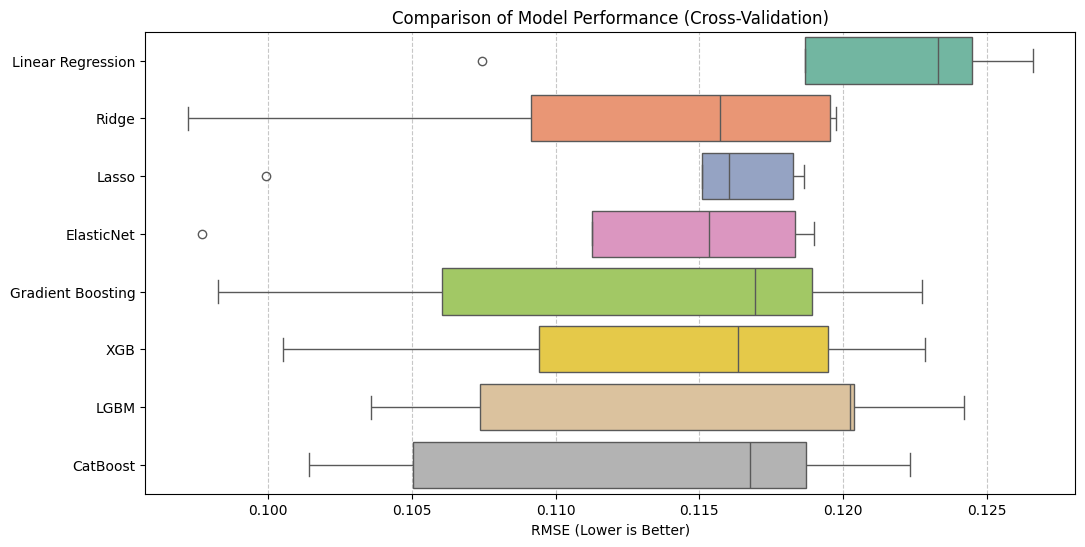

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_results, orient="h", palette="Set2")
plt.yticks(ticks=range(len(all_models)), labels=[m[0] for m in all_models])
plt.xlabel("RMSE (Lower is Better)")
plt.title("Comparison of Model Performance (Cross-Validation)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Model Correlation & Diversity Analysis**

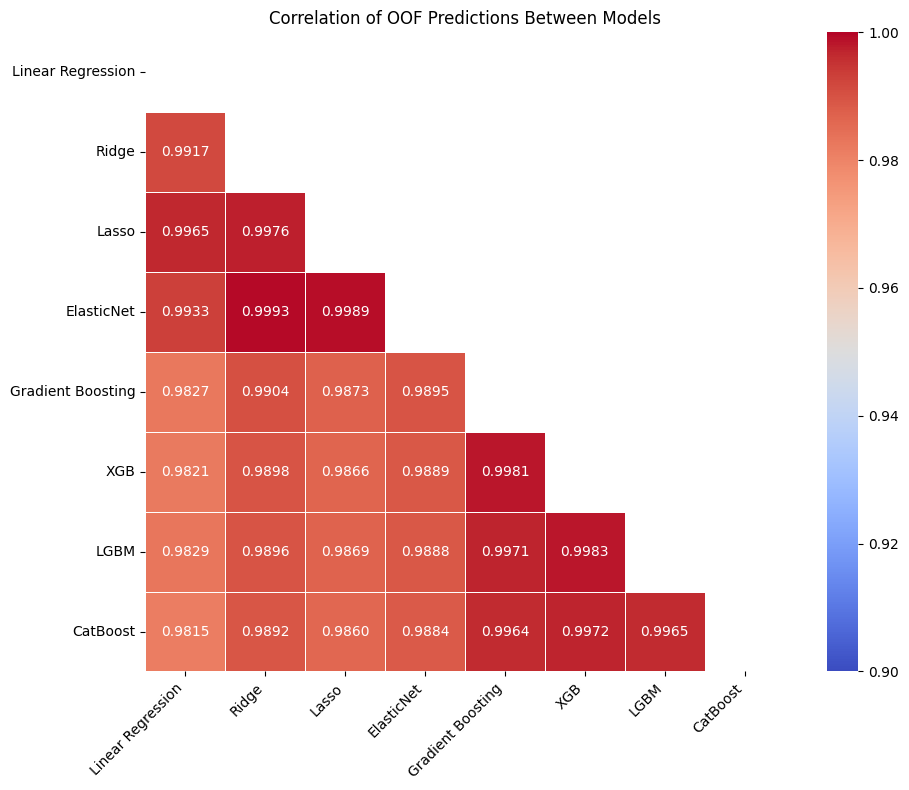

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Out-of-Fold (OOF) Predictions
# Generate cross-validated predictions for each model to analyze their relationships
oof_predictions = pd.DataFrame()

for name, model in all_models:
    # Get predictions using cross-validation to ensure every data point is predicted once
    oof_pred = cross_val_predict(model, X_train_cleanF, y_train_cleanF, cv=kf, n_jobs=-1)
    oof_predictions[name] = oof_pred

corr_matrix = oof_predictions.corr()

plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".4f", cmap="coolwarm", 
            vmin=0.90, vmax=1.0, square=True, linewidths=.5)
plt.title("Correlation of OOF Predictions Between Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Weight Optimization**

In [49]:
def find_best_weights(oof_df, y_true):
    """
    Finds the optimal blending weights for a set of models.
    Goal: Minimize the combined Root Mean Squared Error (RMSE).
    """

    models_to_blend = ['Ridge', 'CatBoost', 'Gradient Boosting']
    
    oof_matrix = oof_df[models_to_blend].values
    y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
    
    best_rmse = float('inf')
    best_weights = None
    
    
    for w1 in np.linspace(0, 1, 21): 
        for w2 in np.linspace(0, 1 - w1, int((1 - w1) / 0.05) + 1): 
            w3 = 1.0 - w1 - w2 
            
            weights = np.array([w1, w2, w3])
            
            final_pred = oof_matrix @ weights
            
            rmse = np.sqrt(mean_squared_error(y_true_arr, final_pred))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_weights = weights
                
    return best_weights, best_rmse

best_w, min_error = find_best_weights(oof_predictions, y_train_cleanF)

print("\n" + "="*30)
print("Optimal Blending Weights:")
print(f"Ridge:             {best_w[0]:.2%}")
print(f"CatBoost:          {best_w[1]:.2%}")
print(f"Gradient Boosting: {best_w[2]:.2%}")
print(f"Minimum CV RMSE with these weights: {min_error:.5f}")
print("="*30)


Optimal Blending Weights:
Ridge:             50.00%
CatBoost:          30.00%
Gradient Boosting: 20.00%
Minimum CV RMSE with these weights: 0.10913


In [51]:
sample_sub = pd.read_csv("C:\\Users\\m\\Desktop\\House Prices Advanced Regression Techniques\\Data\\sample_submission.csv")

**Final Model Fitting & Submission Generation**

In [ ]:
# 1. Final Training on Full Dataset
# Refit the models using all available training data to maximize learning
ridge_model.fit(X_train_cleanF, y_train_cleanF)
cat_best_stable.fit(X_train_cleanF, y_train_cleanF)
best_gb_model.fit(X_train_cleanF, y_train_cleanF)

# 2. Generate Predictions for Test Set
ridge_test_preds = ridge_model.predict(X_test_cleanF)
cat_test_preds = cat_best_stable.predict(X_test_cleanF)
gb_test_preds = best_gb_model.predict(X_test_cleanF)

# 3. Weighted Blending
# Combine model predictions using optimized weights
final_submission_log = (0.50 * ridge_test_preds) + \
                       (0.30 * cat_test_preds) + \
                       (0.20 * gb_test_preds)

# 4. Outlier Clipping
# Limit predictions to the 0.5th and 99.25th percentiles to improve robustness
clip_lo = np.percentile(final_submission_log, 0.5)
clip_hi = np.percentile(final_submission_log, 99.25)
final_submission_log = np.clip(final_submission_log, clip_lo, clip_hi)

# 5. Inverse Transformation
final_prices = np.expm1(final_submission_log)

# 6. Create Submission File
submission = pd.DataFrame({
    'Id': sample_sub['Id'], 
    'SalePrice': final_prices
})
submission.to_csv('final_optimized_submission.csv', index=False)